Redefine the model to be w2 * t_u ** 2 + w1 * t_u + b.

In [1]:
import torch

In [3]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0,21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]



In [4]:
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

What parts of the training loop, and so on, need to change to accommodate
this redefinition?


In [5]:
def model(t_u, w2,w1, b):
  return (w2 * t_u ** 2 + w1 * t_u + b)

What parts are agnostic to swapping out the model?

In [6]:
# loss function

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c) ** 2
  return squared_diffs.mean()

In [43]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    t_p = model(t_u,params[2], params[1], params[0])
    loss = loss_fn(t_p, t_c)

    optimizer.zero_grad()
    loss.backward() # calculate the gradient
    optimizer.step() # this will update the params

    if epoch%500 == 0:
      print(epoch, float(loss))
  
  return params

In [39]:
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

t_p =  model(t_u, w2, w1, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [40]:
loss = loss_fn(t_p,t_c)
loss

tensor(11709471.)

In [11]:
import torch.optim as optim

In [41]:
# normalising input

t_un = 0.1 * t_u

In [44]:
# using training

params = torch.tensor([1.0, 1.0, 0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    t_u=t_un,
    t_c=t_c
)

500 14.349617958068848
1000 11.307303428649902
1500 9.141925811767578
2000 7.600327968597412
2500 6.502435207366943
3000 5.7201642990112305
3500 5.1624040603637695
4000 4.76434326171875
4500 4.479881286621094
5000 4.27622652053833


tensor([-0.0170, -1.1245,  0.5718], requires_grad=True)

c Is the resulting loss higher or lower after training?

The resulting loss is higher

d Is the actual result better or worse?

The result is better

In [36]:
params

tensor([-0.0170, -1.1245,  0.5718], requires_grad=True)

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt

In [29]:
t_p = model(t_un, *params)

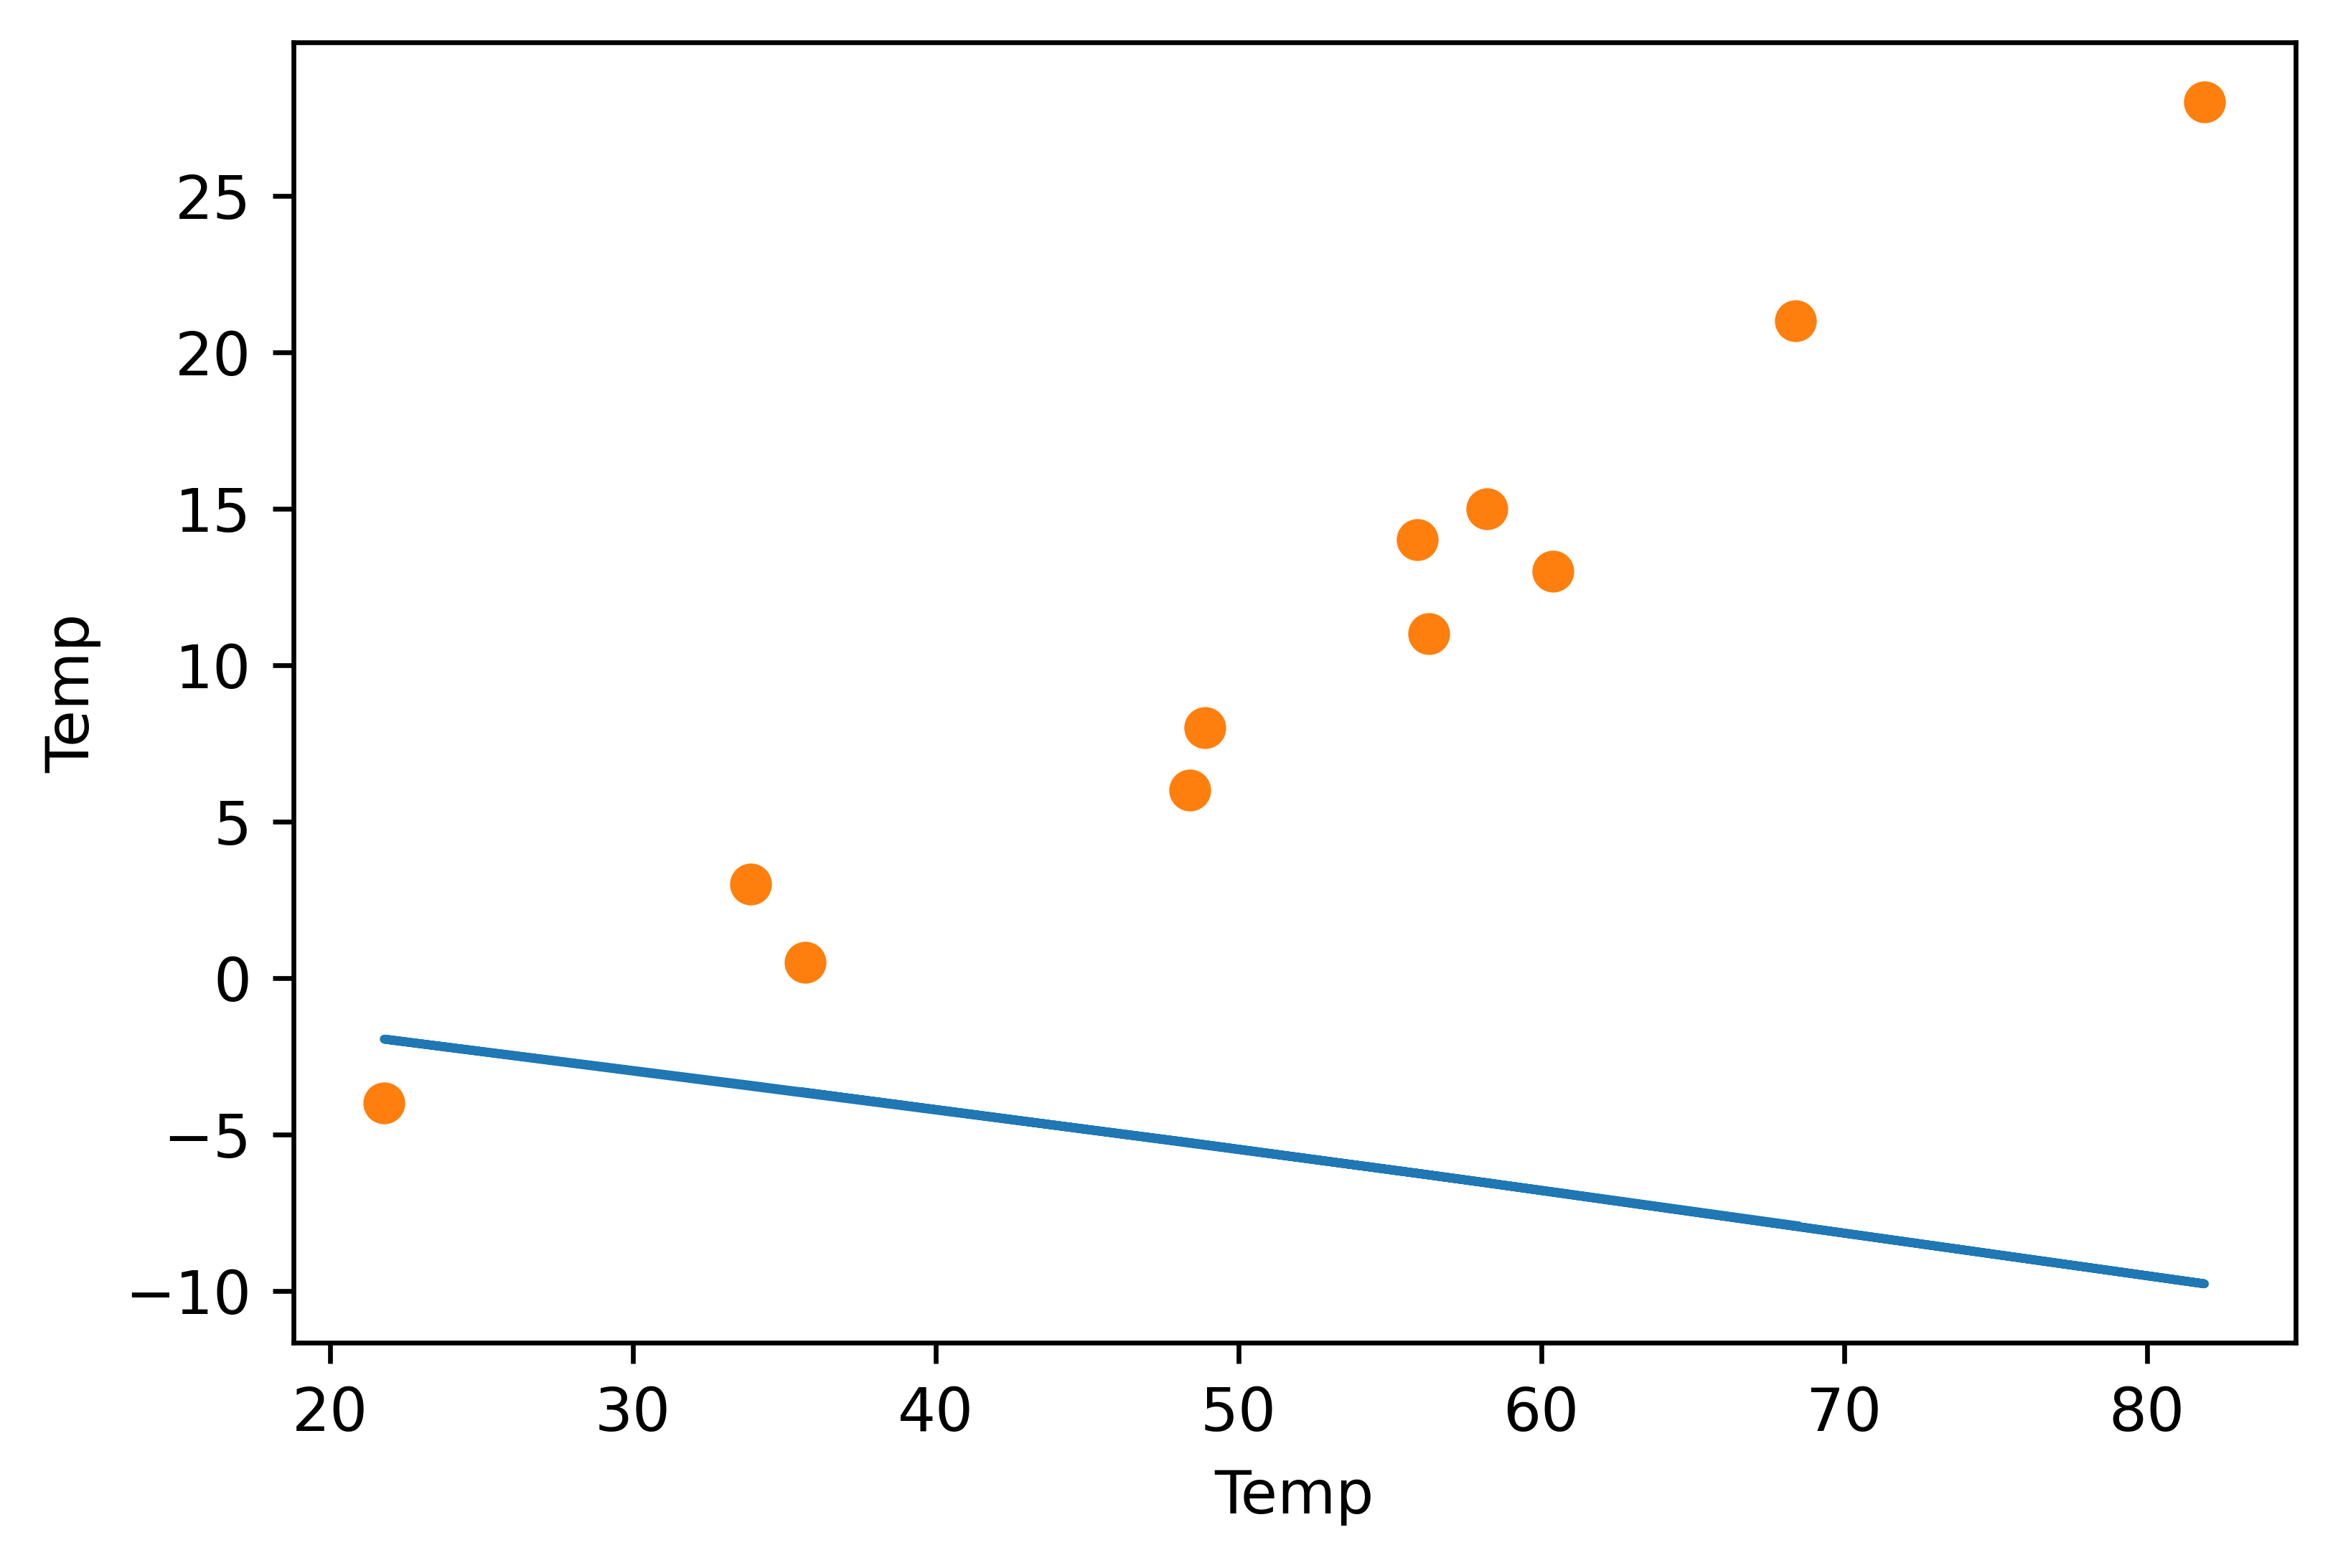

In [37]:
fig = plt.figure(dpi=600)
plt.xlabel("Temp")
plt.ylabel("Temp")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

# but its coming wrong!